In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
file = "StorrunDataDump5_29.csv"
# observation data
df_obs = pd.read_csv(file, low_memory=False)
df_obs['DateTime'] = pd.to_datetime(df_obs['DateTime'], unit='s', utc=True)
df_obs = df_obs.resample('1s', on='DateTime').first().ffill()
df_obs = df_obs.reset_index(drop=False)

In [16]:
file_forecasts = "Storrun_latest_wind_forecasts_2025_06_03.csv"
df_forec = pd.read_csv(file_forecasts)
df_forec['valid_time_cet'] = pd.to_datetime(df_forec['valid_time_cet'])

df_forec['valid_time_cet'] = df_forec['valid_time_cet'].dt.tz_localize('Europe/Stockholm').dt.tz_convert('UTC')
df_forec = df_forec.rename(columns={"valid_time_cet": "valid_time_utc"})
df_forec['total_predicted_power_kw'] = 1000* df_forec['total_predicted_power_mw']
df_forec.columns

Index(['fetch_time_cet', 'valid_time_utc', 'predict_horizon_days_cet',
       'total_predicted_power_mw', 'total_predicted_power_kw'],
      dtype='object')

In [ ]:
df = df_obs.merge(df_forec, how='outer', left_on='DateTime', right_on='valid_time_utc').ffill()
df = df.dropna()
df = df.set_index('DateTime', inplace=True)
df.head()

,POC_activeP,WTGA_activeP,WTGA_activeP.1,avail_activeP,turbine_total_activeP,wind_dir,wind_speed,fetch_time_cet,valid_time_utc,predict_horizon_days_cet,total_predicted_power_mw,total_predicted_power_kw
DateTime,,,,,,,,,,,,
2025-05-28 16:39:43+00:00,50.0,-20.0,-20.0,380.0,90.0,333.35,4.34,2025-05-27 10:45:54.000000,2025-05-28 16:30:00+00:00,1.0,0.0,0.0
2025-05-28 16:39:44+00:00,60.0,-20.0,-20.0,260.0,90.0,333.35,4.34,2025-05-27 10:45:54.000000,2025-05-28 16:30:00+00:00,1.0,0.0,0.0
2025-05-28 16:39:45+00:00,80.0,-20.0,-20.0,260.0,100.0,329.34,4.36,2025-05-27 10:45:54.000000,2025-05-28 16:30:00+00:00,1.0,0.0,0.0
2025-05-28 16:39:46+00:00,70.0,-20.0,-20.0,330.0,120.0,329.81,4.36,2025-05-27 10:45:54.000000,2025-05-28 16:30:00+00:00,1.0,0.0,0.0
2025-05-28 16:39:47+00:00,70.0,-20.0,-20.0,340.0,120.0,330.69,4.37,2025-05-27 10:45:54.000000,2025-05-28 16:30:00+00:00,1.0,0.0,0.0


In [18]:
print(df.iloc[30])
print('-----')
print(df.iloc[31])

POC_activeP                                      120.0
WTGA_activeP                                     -20.0
WTGA_activeP.1                                   -20.0
avail_activeP                                    410.0
turbine_total_activeP                            120.0
wind_dir                                        325.44
wind_speed                                         4.3
fetch_time_cet              2025-05-27 10:45:54.000000
valid_time_utc               2025-05-28 16:30:00+00:00
predict_horizon_days_cet                           1.0
total_predicted_power_mw                           0.0
total_predicted_power_kw                           0.0
Name: 2025-05-28 16:40:13+00:00, dtype: object
-----
POC_activeP                                      120.0
WTGA_activeP                                     -30.0
WTGA_activeP.1                                   -30.0
avail_activeP                                    400.0
turbine_total_activeP                            100.0
wind_dir    

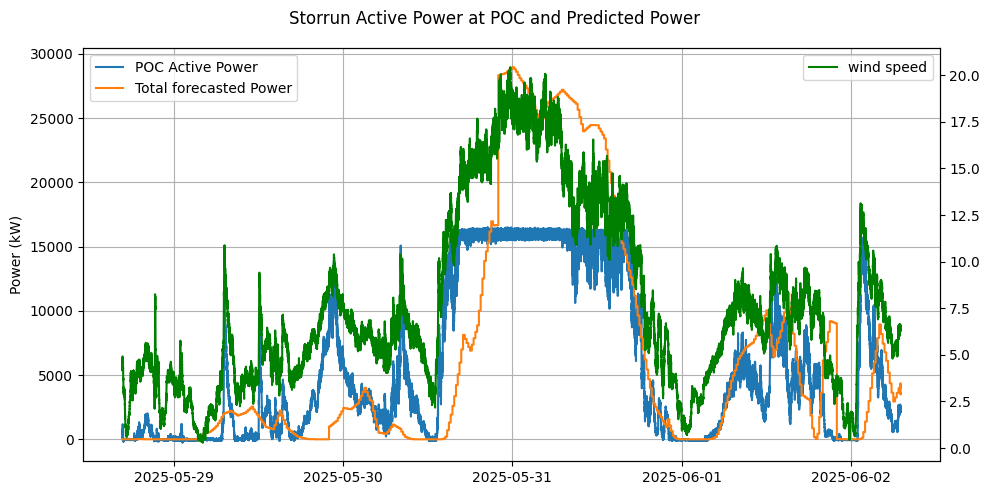

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Storrun Active Power at POC and Predicted Power')
ax.plot(df['POC_activeP'], label='POC Active Power')
ax.plot(df['total_predicted_power_kw'], drawstyle='steps-post', label='Total forecasted Power')
axr = ax.twinx()
axr.plot(df['wind_speed'], label='wind speed', color='green')
_ = ax.set_ylabel('Power (kW)'), ax.legend(loc='upper left'), ax.grid(), fig.tight_layout(), axr.legend(loc='upper right')

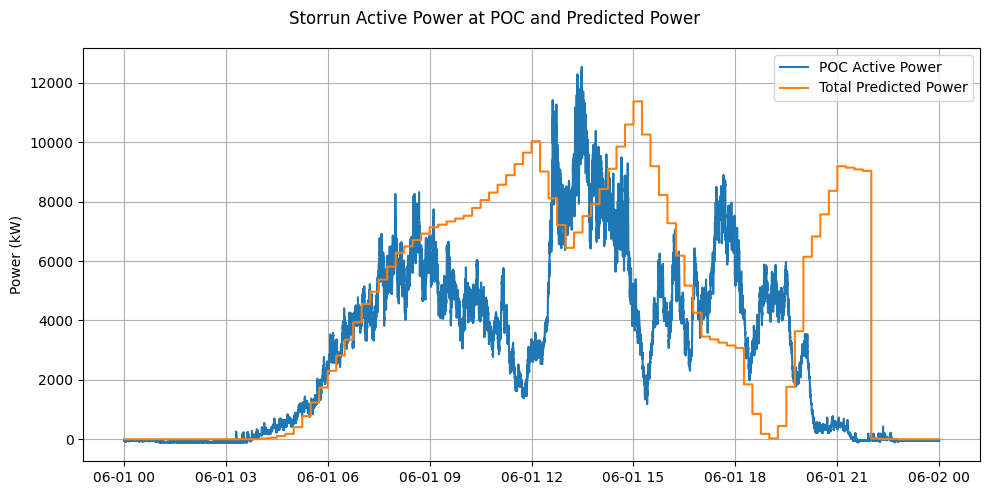

In [ ]:
start = '2025-06-01 00:00:00'
end = '2025-06-02 00:00:00'
df_ = df[start:end]
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Storrun Active Power at POC and Predicted Power')
ax.plot(df_['POC_activeP'], label='POC Active Power')
ax.plot(df_['total_predicted_power_kw'], drawstyle='steps-post', label='Total Predicted Power')
_ = ax.set_ylabel('Power (kW)'), ax.legend(), ax.grid(), fig.tight_layout()